In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import SVC,SVR
import matplotlib.pyplot as plt
import kagglehub
from sklearn.neural_network import MLPRegressor

In [ ]:
path2 = kagglehub.dataset_download("lorenzozoppelletto/financial-risk-for-loan-approval")
print("Path to dataset files:", path2)

Path to dataset files: /root/.cache/kagglehub/datasets/lorenzozoppelletto/financial-risk-for-loan-approval/versions/2


In [ ]:
loans = pd.read_csv(path2 + '/Loan.csv')
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [ ]:
le = LabelEncoder() # Changing categorical data
loans['ApplicationDate'] = le.fit_transform(loans['ApplicationDate'])
loans['EmploymentStatus'] = le.fit_transform(loans['EmploymentStatus'])
loans['EducationLevel'] = le.fit_transform(loans['EducationLevel'])
loans['MaritalStatus'] = le.fit_transform(loans['MaritalStatus'])
loans['HomeOwnershipStatus'] = le.fit_transform(loans['HomeOwnershipStatus'])
loans['LoanPurpose'] = le.fit_transform(loans['LoanPurpose'])
loans.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,0,45,39948,617,0,4,22,13152,48,1,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,1,38,39709,628,0,0,15,26045,48,2,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2,47,40724,570,0,1,26,17627,36,1,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,3,58,69084,545,0,3,34,37898,96,2,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,4,37,103264,594,0,0,17,9184,36,1,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [ ]:
x=loans.drop(columns=['RiskScore'])
x.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,0,45,39948,617,0,4,22,13152,48,1,...,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0
1,1,38,39709,628,0,0,15,26045,48,2,...,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0
2,2,47,40724,570,0,1,26,17627,36,1,...,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0
3,3,58,69084,545,0,3,34,37898,96,2,...,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0
4,4,37,103264,594,0,0,17,9184,36,1,...,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1


In [ ]:
y=loans['RiskScore']
y.head()

,RiskScore
0,49.0
1,52.0
2,52.0
3,54.0
4,36.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [ ]:
# create an SVR model with a linear kernel
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_train, y_train)
y_pred_rbf = svr_rbf.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred_rbf)  # Calculate the mean squared error between true and predicted values
print(f"Mean Squared Error: {mse}")  # Print the mean squared error

Mean Squared Error: 39.19608625385367


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))  # Reshape using .values
y_test = scaler.transform(y_test.values.reshape(-1, 1))  # Reshape using .values

In [ ]:

model = MLPRegressor(
    hidden_layer_sizes=(128,128,64,64),
    activation='logistic',
    solver='lbfgs',
    max_iter=1000,
    random_state=42

)



In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(activation='logistic', hidden_layer_sizes=(128, 128, 64, 64),
             max_iter=1000, random_state=42, solver='lbfgs')

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mae=mean_absolute_error(y_test, y_pred)
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error (MSE): 0.04
Mean Absolute Error: 0.14850893929763015
R-squared (R2): 0.97
Root Mean Squared Error (RMSE): 0.19


In [ ]:
# Weighted Average with custom weights
weights = [0.3, 0.3, 0.1, 0.2, 0.1]
y_pred_weighted = (
                   weights[3] * svr_rbf.predict(X_test) +  # Use svr_rbf.predict
                   # Assuming you intended to use model here and extract the first column of predictions
                   weights[4] * model.predict(X_test)[:, 0] if model.predict(X_test).ndim > 1 else weights[4] * model.predict(X_test)
                  )
mse_weighted = mean_squared_error(y_test, y_pred_weighted)
print(f"Weighted Average Model MSE: {mse_weighted:.4f}")

Weighted Average Model MSE: 0.8547


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_diabetes, load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor, LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, StackingRegressor, StackingClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt


In [ ]:
# Initialize individual regression models
lr = LinearRegression()
ridge = Ridge(alpha=1.0)
svr_rbf = SVR(kernel='rbf')
sgd = SGDRegressor(max_iter=1000, tol=1e-3)
NT = MLPRegressor(hidden_layer_sizes=(128,128,64,64),
    activation='logistic',
    solver='lbfgs',
    max_iter=1000,
    random_state=42)

# Train the individual models
lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)
svr_rbf.fit(X_train, y_train)
sgd.fit(X_train, y_train)
# Ensure NT is also trained
NT.fit(X_train, y_train)

# Evaluate individual models
models = [("Linear Regression", lr), ("Ridge Regression", ridge),
          ("SVR",svr_rbf), ("SGD Regressor", sgd),
          ("NETWRKS", NT)]

model_names = []
mse_values = []

for name, model in models:
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    model_names.append(name)
    mse_values.append(mse)
    print(f"{name} MSE: {mse:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED L

Linear Regression MSE: 0.0655
Ridge Regression MSE: 0.0655
SVR MSE: 0.0383
SGD Regressor MSE: 0.0656
NETWRKS MSE: 0.0148


<ipython-input-271-5dde62afaf30>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MSE', data=results_df, palette='viridis')


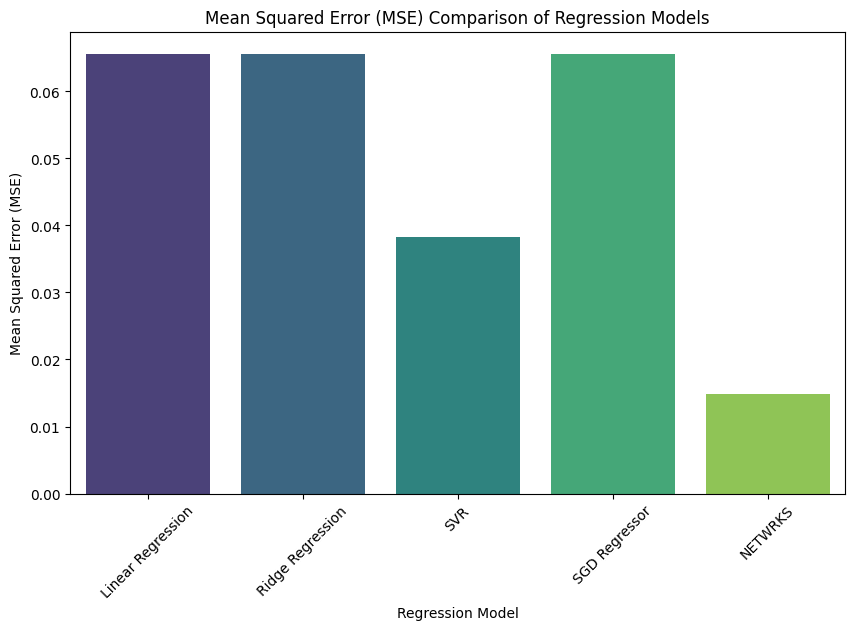

In [ ]:
results_df = pd.DataFrame({
    'Model': model_names,
    'MSE': mse_values
})

# Plot the results using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE', data=results_df, palette='viridis')
plt.title('Mean Squared Error (MSE) Comparison of Regression Models')
plt.xlabel('Regression Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Weighted Average with custom weights
weights = [0.1, 0.1, 0.1, 0.1, 0.6]
y_pred_weighted = (
    weights[0] * lr.predict(X_test).ravel() +
    weights[1] * ridge.predict(X_test).ravel() +
    weights[2] * svr_rbf.predict(X_test).ravel() +
    weights[3] * sgd.predict(X_test).ravel() +
    weights[4] * NT.predict(X_test).ravel()
)
mse_weighted = mean_squared_error(y_test, y_pred_weighted)
print(f"Weighted Average Model MSE: {mse_weighted:.4f}")

Weighted Average Model MSE: 0.0197


In [ ]:
from sklearn.ensemble import VotingRegressor

# Create a Voting Regressor
voting_reg = VotingRegressor(estimators=[
    ('lr', lr), ('ridge', ridge), ('SVR', svr_rbf), ('sgd', sgd), ('knn', NT)
])

# Train and evaluate the voting regressor
voting_reg.fit(X_train, y_train)
y_pred = voting_reg.predict(X_test)
mse_voting = mean_squared_error(y_test, y_pred)
print(f"Voting Regressor MSE: {mse_voting:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py:698: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Voting Regressor MSE: 0.0358
